<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CIS2300/blob/main/CIS2300_Class24_Combine_Merge_DataFrames_cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIS2300 Class 24     
**Combine and Merge Data in Pandas**    

*A copy of this notebook is available at https://bit.ly/cis2300class24*  



##Housekeeping    

In [ ]:
import pandas as pd

import numpy as np


---

##Combing/Joining Two DataFrames  
###The U.S. Cities Example  

###Fetch Data Files    

####Fetch a SAMPLE `csv` file of cities/states and their latitude/longitude into a dataframe

In [ ]:
!curl "https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/cities_lat-dd_lon-dd.csv" -o cities_lat-dd_lon-dd.csv

####Fetch a `csv` file of largest U.S. cities/states and their populations into a dataframe

In [ ]:
!curl "https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/cities-pop_2020-2022.csv" -o cities-pop_2020_2022.csv

---

###Load Dataframes    

####Load a SAMPLE `csv` file of N.A. cities/states and their latitude/longitude into a dataframe

In [ ]:
cols_i_like = ['city', 'state', 'lat_dd', 'lon_dd']

In [ ]:
cities_geo_df = pd.read_csv('cities_lat-dd_lon-dd.csv', usecols=cols_i_like)

In [ ]:
cities_geo_df = pd.read_csv('cities_lat-dd_lon-dd.csv')

In [ ]:
cities_geo_df

In [ ]:
cities_geo_df.dtypes

In [ ]:
cities_geo_df

####Load a `csv` file of largest U.S. cities/states and their populations into a dataframe

In [ ]:
cities_pop_df = pd.read_csv('cities-pop_2020_2022.csv')

In [ ]:
cities_pop_df.dtypes

In [ ]:
cities_pop_df

---

###Combine Exercises    

####Merge (inner join) on named columns    

In [ ]:
city_merge_inner = pd.merge(cities_geo_df, cities_pop_df, left_on='city', right_on='city')

In [ ]:
city_merge_inner

*Some `city` names are redundant across states.  A more reliable `merge` would use both `state` and `city` as keys.*

In [ ]:
# merging on a list of key column names
city_merge_inner = pd.merge(cities_geo_df, cities_pop_df, on=['state', 'city'])

In [ ]:
city_merge_inner

####Merge (outer join) on named columns    

In [ ]:
city_merge_outer = pd.merge(cities_geo_df, cities_pop_df, left_on='city', right_on='city', how='outer')

In [ ]:
city_merge_outer

*Refining that for `city` names which may be redundant across states, we construct a more reliable `merge` woul using both `state` and `city` as keys.*

In [ ]:
city_merge_inner = pd.merge(cities_geo_df, cities_pop_df, on=['state', 'city'], how='outer')

In [ ]:
city_merge_outer

####Merge (inner join) on index/indices    

Let's create hierarchical row indices for each of the city dataframes.

In [ ]:
geo_df = cities_geo_df.set_index(['state', 'city'])

In [ ]:
geo_df

In [ ]:
pop_df = cities_pop_df.set_index(['state', 'city'])

In [ ]:
pop_df

Merge (inner join) the `geo_df` with the `pop_df` based on their indices.

In [ ]:
merge_inner = pd.merge(geo_df, pop_df, left_index=True, right_index=True)

In [ ]:
merge_inner

If one dataframe had keys in columns, not the indices but it is being merged with like keys in the other dataframe.

In [ ]:
mixed_merge_inner = pd.merge(cities_geo_df, pop_df, left_on=['state', 'city'], right_index=True)

In [ ]:
mixed_merge_inner

In [ ]:
mixed_merge_inner = pd.merge(geo_df, cities_pop_df, left_index=True, right_on=['state', 'city'])

In [ ]:
mixed_merge_inner

Merge (outer join) the `geo_df` with the `pop_df` based on their indices.

In [ ]:
merge_outer = pd.merge(geo_df, pop_df, left_index=True, right_index=True, how='outer')

In [ ]:
merge_outer

If one dataframe had keys in columns, not the indices but it is being merged with like keys in the other dataframe.

In [ ]:
mixed_merge_outer = pd.merge(geo_df, pop_df, left_index=True, right_on=['state', 'city'])

#####Using `join` on index/indices    

**An inner `.join()` on index/indices**

In [ ]:
joined_inner = geo_df.join(pop_df)

In [ ]:
joined_inner

**An outer `.join()` on index/indices**

In [ ]:
joined_outer = geo_df.join(pop_df, how='outer')

In [ ]:
joined_outer



---



##More Combining/Joining DataFrames  

*optional content and practice exercises*

###From the CIS2300 Class 17 Notebook  

Remember to have the following housekeeping done before using pandas.

In [ ]:
# Import pandas for DataFrame and other functionality
import pandas as pd

# Import numpy for numerical functions
import numpy as np


###B.6 **Concatenation and Joining DataFrames** (Set Operations)    

Pandas provides some useful functions and approaches to combine data from multiple sources.    

The following methods can be used to combine DataFrame content:    

>a.   **`.append()`** - with **same column**    
>b.   **`.append()`** - with **different column**    
>c.   **`.concat()`** - with **join="outer"**    
>d.   **`.concat()`** - with **join="inner"**    
>e.   **SQL join Analogies**    




####B.6.a **`.append()` with same column**

Typically, data may comes from different sources.  Combining sources of data together into a single DataFrame is very useful.

The following example uses a very simple scenario.

In the example there are two DataFrame structures with the same column names. We want to combine these two DataFrames into one. Before trying it in pandas, do you remember how to do it using the native Python type `list`? We would use `.append()` to add items to a Python `list`. In pandas, the function is also `.append()`. This example concatenates the two DataFrame objects along `axis=0`, namely the `index` or `column`.

**Pro-Tip:**

In this example, the function works on one DataFrame.

*Multiple DataFrames can be passed using a `list` as an argument to the function.*

*The `index` can be duplicated.*

**ignore_index=True** could be passed as an argument, if the `index` of this DataFrame is arbitrary.


<center><b><u><h2>Illustration: .append() with the same column(s)</h2></u></b></center>    

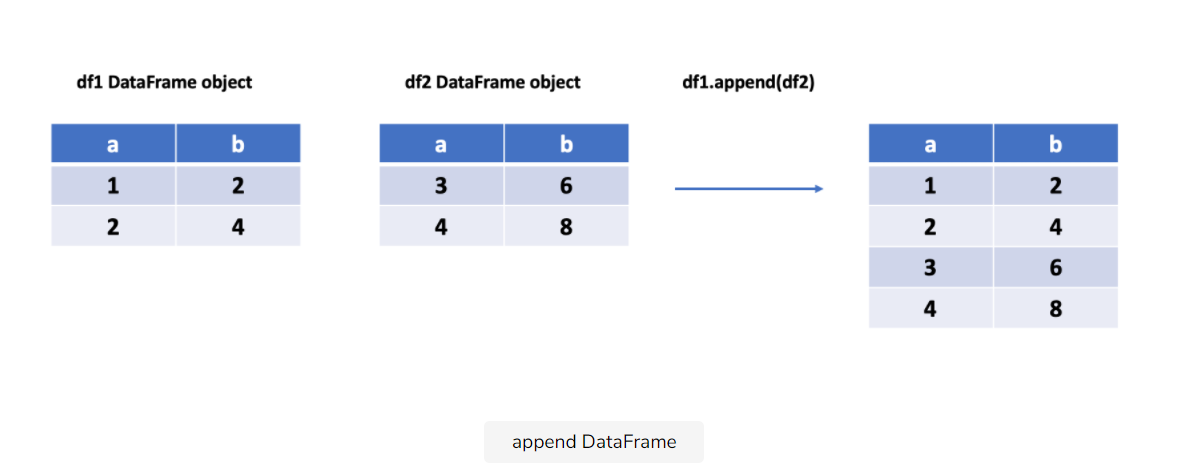

In [ ]:
d1 = {"a": [1, 2], "b": [2, 4]}
df1 = pd.DataFrame(d1)

print("The first DataFrame df1 ")
print(df1)

print("\n------------------------\n")

d2 = {"a": [3, 4], "b": [6, 8]}
df2 = pd.DataFrame(d2)

print("The second DataFrame df2 ")
print(df2)

df2 = pd.DataFrame(d2)

print("\n------------------------\n")

df1 = df1.append(df2)
print("Append the second DataFrame df2 to the first one df1 ")
print(df1)


print("\n------------------------\n")

print("Resetting the first DataFrame df1 to its original values")
df1 = pd.DataFrame(d1)
print("Append the second DataFrame df2 to the first one df1 and set ignore_index=True")
df1 = df1.append(df2, ignore_index=True)
print(df1)


Without the `ignore_index=True` argument, the first example creates a DataFrame `df1` which has redundant `index` values -- they are duplicated for rows of the original DataFrames (`df1` and `df2`) which had the same index value.  

Let' look at that same process but with unbalanced rows in the DataFrames.  We can use the original `df1` as a 2x2 matrix but let's change `df2` to be a 2x3 matrix.

In [ ]:
d1 = {"a": [1, 2], "b": [2, 4]}
df1 = pd.DataFrame(d1)

print("The first DataFrame df1 ")
print(df1)

print("\n------------------------\n")

d2 = {"a": [3, 4, 5], "b": [6, 8, 10]}
df2 = pd.DataFrame(d2)

print("The second DataFrame df2 ")
print(df2)

df2 = pd.DataFrame(d2)

print("\n------------------------\n")

df1 = df1.append(df2)
print("Append the second DataFrame df2 to the first one df1 ")
print(df1)

####B.6.b **`.append()` with different column(s)**

Not all DataFrames have the same `column` names. If two DataFrames have different `column` names then they would be joined where the `column` names are the same and the remaining positions would be filled by `NaN` which stands for *missing data* or *not a number*. .


<center><b><u><h2>Illustration: .append() with different columns</h2></u></b></center>    

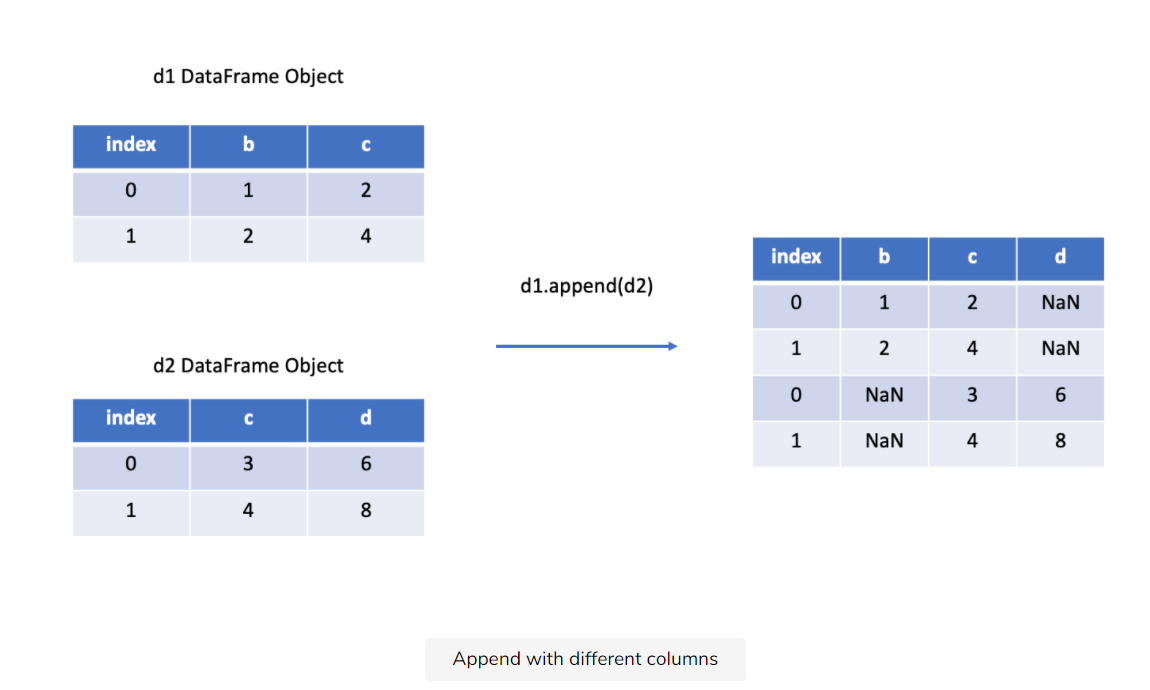

In [ ]:
d1 = {"b": [1, 2], "c": [2, 4]}
df1 = pd.DataFrame(d1)

print("The first DataFrame df1 ")
print(df1)

print("\n------------------------\n")

d2 = {"c": [3, 4], "d": [6, 8]}
df2 = pd.DataFrame(d2)

print("The second DataFrame df2 ")
print(df2)

df2 = pd.DataFrame(d2)

print("\n------------------------\n")

df1 = df1.append(df2)
print("Append the second DataFrame df2 to the first one df1 ")
print(df1)


The columns of the combined DataFrame above can be different.  This can be a type of semantic error encountered when processing data with different `column` names.  The differences can be subtle such as differences in capitalization, use of dashes vs. underscores, or even leading non-printable characters as we saw in earlier examples.     

*Be alert to these types if mismatches.*

In [ ]:
d1 = {"b": [1, 2], "c": [2, 4]}
df1 = pd.DataFrame(d1)

print("The first DataFrame df1 ")
print(df1)

print("\n------------------------\n")

d2 = {"B": [3, 4], "C": [6, 8]}
df2 = pd.DataFrame(d2)

print("The second DataFrame df2 ")
print(df2)

df2 = pd.DataFrame(d2)

print("\n------------------------\n")

df1 = df1.append(df2)
print("Append the second DataFrame df2 to the first one df1 ")
print(df1)

####B.6.c **`.concat()` with join="outer" (default)**    

**`.concat()`** is a much more powerful function to join DataFrames, because it can combine DataFrame objects along both rows and columns, unlike append which only works with rows.

*   By default **`.concat()`** joins DataFrames and columns, just as **`.append()`** does.

*   **`axis=1`** can be passed to join DataFrames along with `rows`.

*   **`join`** is a parameter that specifies how to handle indexes on another axis. **"outer" for union and "inner" for intersection.**

The following example shows an **outer** join. The first DataFrame `df1` has an `index [1, 2]`, the second DataFrame `df2` has an `index [2, 3]`, they have one overlapping `index, 2`. The rows with `index=2` in both DataFrames would join; other rows would be kept separate.  Any empty location(s) will be filled by `NaN`.  After `.concat()`, the total `row` number is 3.    


<center><b><u><h2>Illustration: .concat() with join="outer"</h2></u></b></center>    

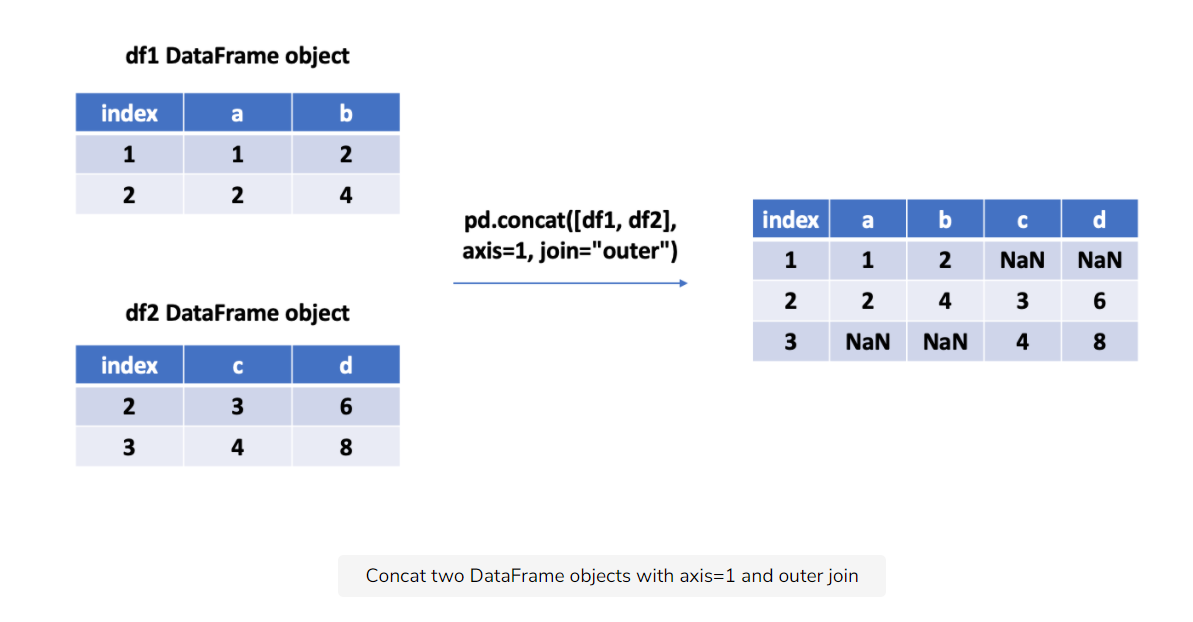

In [ ]:

d1 = {"a": [1, 2], "b": [2, 4]}
df1 = pd.DataFrame(d1, index=[1, 2])

print("The first DataFrame")
print(df1)

print("\n------------------------\n")

d2 = {"c": [3, 4], "d": [6, 8]}
df2 = pd.DataFrame(d2, index=[2, 3])

print("The second DataFrame")
print(df2)

print("\n------------------------\n")

print("The outer join DataFrame")
df3 = pd.concat([df1, df2], axis=1)
print(df3)


Note that as in the example above, `.concat()` results in the creation of a new DataFrame `df3`.  This preserves the integrity of the two source DataFarames `df1` and `df2`.  When cleansing data or performing **Extract, Translate, and Load (ETL)** activities, it is always helpful to keep an audit trail of sources and changes and to maintain checkpoints along the way to save rework in the event of an anomaly or interruption in the process.     

####B6.d **`.concat()` with `join="inner"`**

Inner join handles the `index` for the intersection. In the following example, the two DataFrames `DF1` and `DF2` share only one common `index, 2`. So, the final DataFrame `df3` has only one `row`.



<center><b><u><h2>Illustration: .concat() with join="inner"</h2></u></b></center>    

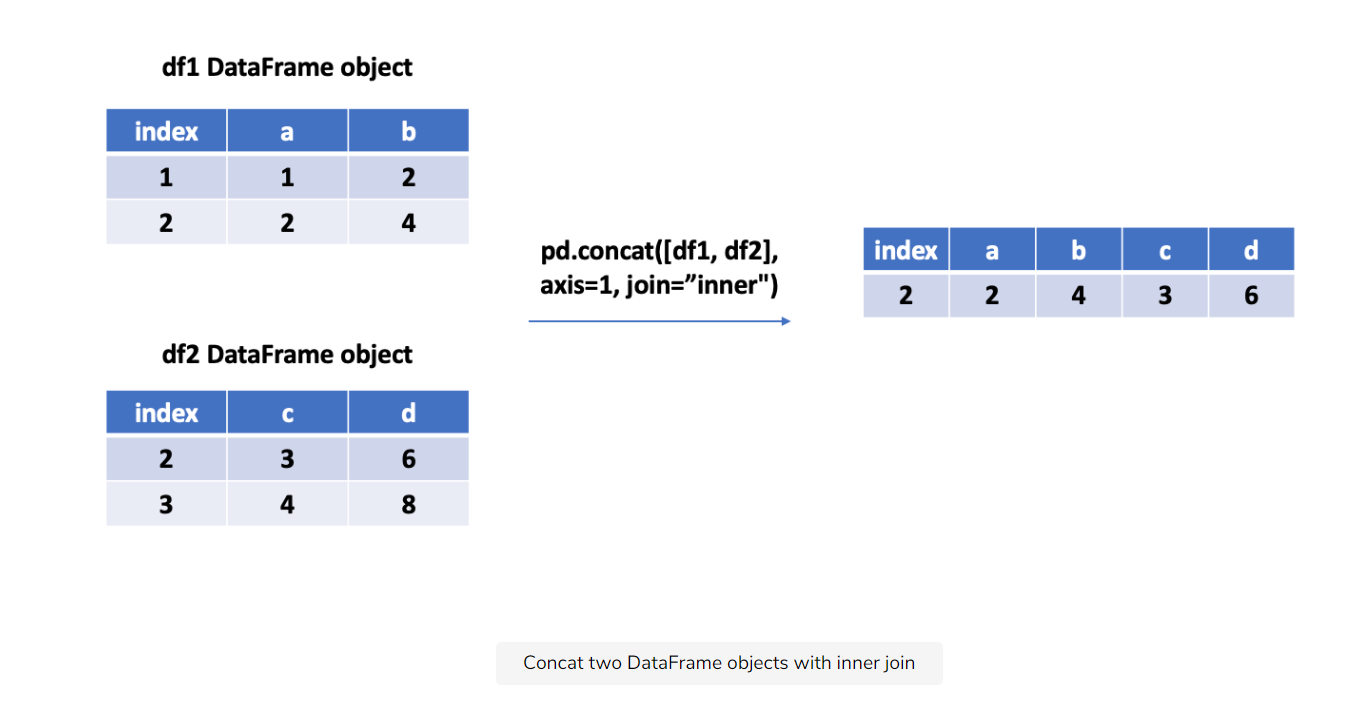

In [ ]:
d1 = {"a": [1, 2], "b": [2, 4]}
df1 = pd.DataFrame(d1, index=[1, 2])
print("The first DataFrame")
print(df1)

print("\n------------------------\n")

d2 = {"c": [3, 4], "d": [6, 8]}
df2 = pd.DataFrame(d2, index=[2, 3])
print("The second DataFrame")
print(df2)

print("\n------------------------\n")

print("The inner join DataFrame")
df3 = pd.concat([df1, df2], axis=1, join="inner")
print(df3)


####B.6.e **`SQL` Join Analogies**

If you are familiar with joining tables in `SQL` the following analogies may help in understanding the various join methods in pandas.  Remember that in pandas you are changing the state of an object whereas `SQL` is a procedural language working with `tables` as inputs and outputs.  Nevertheless, with some adjustment to the algorithm used, each can produce similar results.

**Each pandas `.concat()` join type is compared to an analogous `SQL JOIN` statement:**

*   join="**inner**" - INNER JOIN
*   join="**outer**" (default) - FULL OUTER JOIN
*   join="**right**" - RIGHT OUTER JOIN
*   join="**left**" - LEFT OUTER JOIN


---
